In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!gdown --id 1yI2x4qazF5vuMFw_aof-4laGe366TyrJ
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
!pip install mlxtend 
import statsmodels.api as sm
import sys
import joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yI2x4qazF5vuMFw_aof-4laGe366TyrJ
To: /content/kaggle.json
100% 66.0/66.0 [00:00<00:00, 289kB/s]
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set_style('whitegrid')

In [5]:
!kaggle datasets download -d adityamishraml/nasaexoplanets -f cleaned_5250.csv
!unzip -o cleaned_5250.csv.zip
df_nasa = pd.read_csv('cleaned_5250.csv')
df_nasa.head()

  0% 0.00/504k [00:00<?, ?B/s]
100% 504k/504k [00:00<00:00, 156MB/s]
unzip:  cannot find or open cleaned_5250.csv.zip, cleaned_5250.csv.zip.zip or cleaned_5250.csv.zip.ZIP.


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


In [ ]:
df_nasa.index = df_nasa['name']
df_nasa1 = df_nasa.drop('name', axis='columns')
df_nasa1.head()

In [7]:
df_nasa2=df_nasa1.groupby(['planet_type']).size().reset_index(name='cantidad')
df_nasa3=df_nasa1.groupby(['discovery_year']).size().reset_index(name='cantidad')
Total= df_nasa3.cantidad.sum()

In [8]:
df_nasa4= df_nasa.assign(tamaño_real="")
df_nasa4.reset_index(inplace=True, drop=True)

for i in range(len(df_nasa)):
  if df_nasa4.iloc[i]['mass_multiplier']!='':
    if df_nasa4.iloc[i]['mass_wrt'] == 'Jupiter':
      x = float(df_nasa4.iloc[i]['mass_multiplier'])*1898
      df_nasa4.at[i,'tamaño_real'] = x
    elif df_nasa4.iloc[i]['mass_wrt'] == 'Earth':
      x = float(df_nasa4.iloc[i]['mass_multiplier'])*5.972 
      df_nasa4.at[i,'tamaño_real'] = x

---
---
# ***Análisis y procesamiento datos nulos:***
> Suplencia por moda y eliminación de planetas Unknown ya que al ser solo 5 no modifica los análisis, sino que los confunde.

In [11]:
df_nasa4.drop(df_nasa4[(df_nasa4['planet_type'] == "Unknown")].index, inplace=True)
df_nasa4.isnull().sum()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       18
mass_wrt              18
radius_multiplier     12
radius_wrt            12
orbital_radius       286
orbital_period         0
eccentricity           0
detection_method       0
tamaño_real            0
dtype: int64

<Axes: >

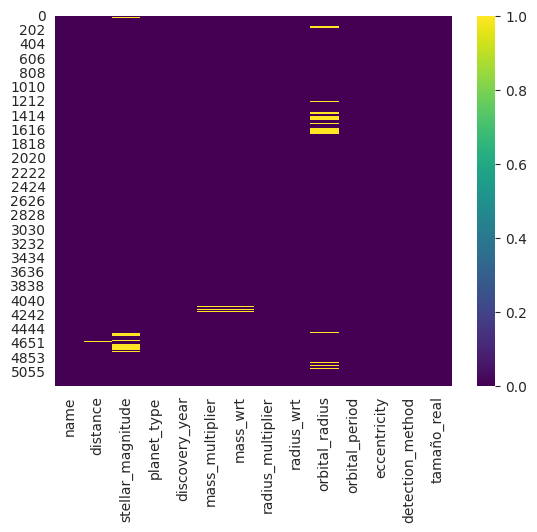

In [12]:
sns.heatmap(df_nasa4.isnull(),cmap = 'viridis')

In [13]:
# reemplazar con la moda
valores = df_nasa4.values #numpy array con los valores
imputador = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
#definir el imputador
# transformar el dataset
transformados = imputador.fit_transform(valores)
transformados=pd.DataFrame(transformados)
columns_names_list = list(df_nasa4)
df_nasa5 = transformados
df_nasa5.columns = columns_names_list

In [14]:
df_nasa5.isnull().sum()


name                 0
distance             0
stellar_magnitude    0
planet_type          0
discovery_year       0
mass_multiplier      0
mass_wrt             0
radius_multiplier    0
radius_wrt           0
orbital_radius       0
orbital_period       0
eccentricity         0
detection_method     0
tamaño_real          0
dtype: int64

<Axes: >

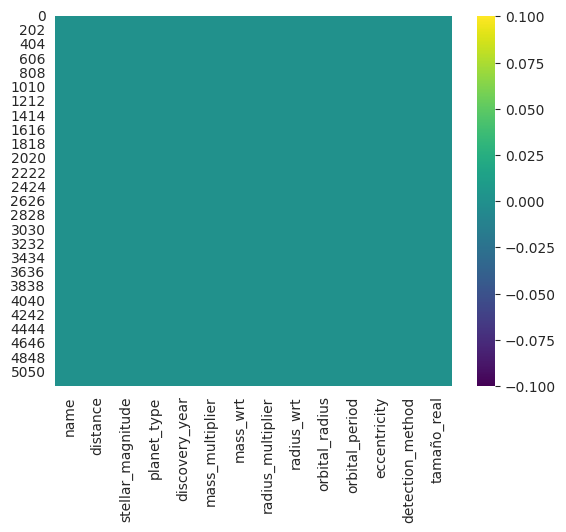

In [15]:
sns.heatmap(df_nasa5.isnull(),cmap = 'viridis')

---
---
>
> 
## *Introducción:*
> 
> 
>**Contexto empresarial:**
> 
>El Planetario Galileo Galilei está haciendo una recopilación de datos en base al tiempo transcurrido sobre el hallazgo de planetas con el fin de realizar una presentación para exponer a las nuevas generaciones y atraer al mundo de la astronomía a aquellos interesados.
> 
>Fuiste contratado para realizar una reseña de todos los datos recopilados con visualizaciones que ayuden a realizar esta presentación para el público.
>
>**Problema comercial:**
>
>Te asignaron la tarea de responder a las siguientes incógnitas que necesitan para la presentación.
>
>>Según los tipos de planetas, ¿Cuántos hay de cada uno?
>>
>>¿Qué relación encuentras entre los datos de los planetas?
>>
>>¿Cómo los encontramos?
>>
>>¿Hubo un aumento de hallazgos a medida que pasaba el tiempo?
>
>**Contexto analítico:**
>
>Se nos ha proporcionado un dataset en formato CSV el cual contiene la información acumulada de hallazgos de 1992 a 2023
> 
## *Exploración de Datos y resolución:*
> Según los tipos de planetas, ¿Cuántos hay de cada uno?

In [16]:
df_planetasGroup = df_nasa5.groupby(["planet_type"]).size().reset_index(name='cantidad')
df_planetasGroup

,planet_type,cantidad
0,Gas Giant,1630
1,Neptune-like,1825
2,Super Earth,1595
3,Terrestrial,195


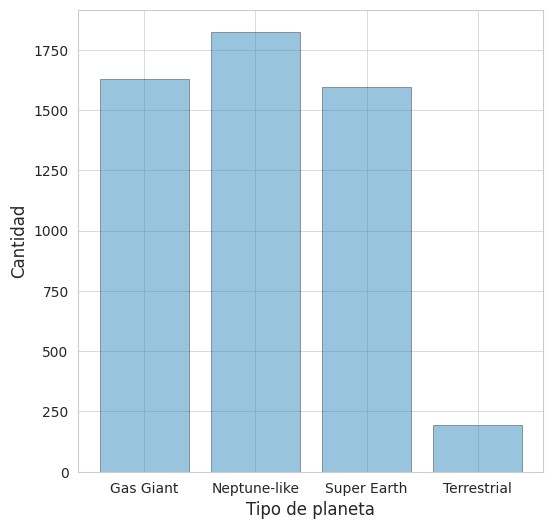

In [17]:
#Subplots mat
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(df_planetasGroup["planet_type"], df_planetasGroup.cantidad, edgecolor='k', alpha=0.5)
ax.set_ylabel('Cantidad')
ax.set_xlabel('Tipo de planeta')
plt.show()

> Respuesta: Si observamos el análisis anterior observamos cuatro tipos de planetas que se dividen en:
>>
>>Gigantes gaseosos(Gas Giant) 1630 planetas
>>
>>Tipo Neptuno (Neptune-like) 1825 planetas
>>
>>Super Tierras (Super Earth) 1595 planetas
>>
>>Terrestres (Terrestrial) 195 planetas      
> 
>¿Qué relación encuentras entre los datos de los planetas?

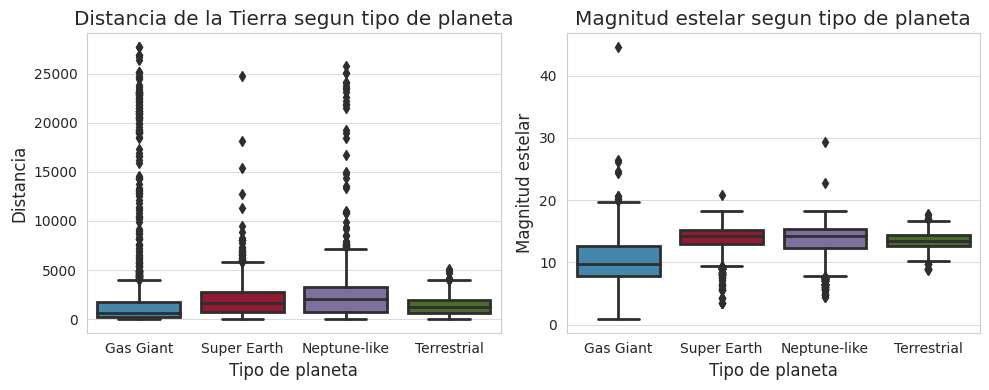

In [18]:
f, axs = plt.subplots(1, 2, figsize=(10, 4),
gridspec_kw=dict(width_ratios=[5, 5]))

ax1 = sns.boxplot(x="planet_type", y="stellar_magnitude", data=df_nasa5, ax=axs[1])
ax1.set_title('Magnitud estelar segun tipo de planeta')
ax1.set_ylabel('Magnitud estelar')
ax1.set_xlabel('Tipo de planeta')
ax2 = sns.boxplot(x="planet_type", y="distance", data=df_nasa5, ax=axs[0] )
ax2.set_title('Distancia de la Tierra segun tipo de planeta')
ax2.set_ylabel('Distancia')
ax2.set_xlabel('Tipo de planeta')
f.tight_layout()

Text(0, 0.5, 'Distancia')

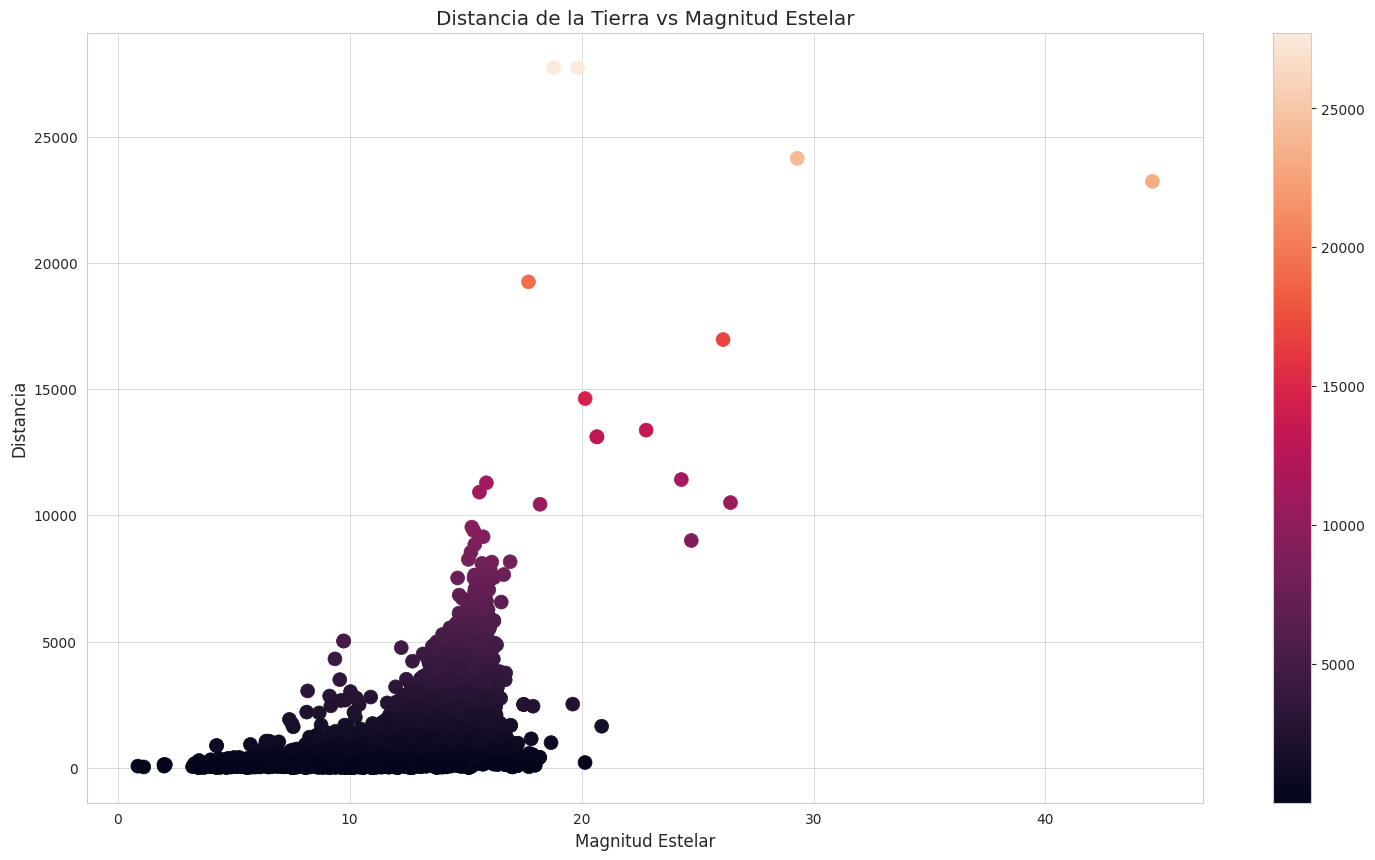

In [20]:
fig, ax = plt.subplots(figsize=(18, 10))  
mapeo_colores = ax.scatter(df_nasa4['stellar_magnitude'], df_nasa4['distance'],c=df_nasa4['distance'], s=100)
fig.colorbar(mapeo_colores)
ax.set_title('Distancia de la Tierra vs Magnitud Estelar')
ax.set_xlabel('Magnitud Estelar')
ax.set_ylabel('Distancia')

Text(0, 0.5, 'Radio orbital')

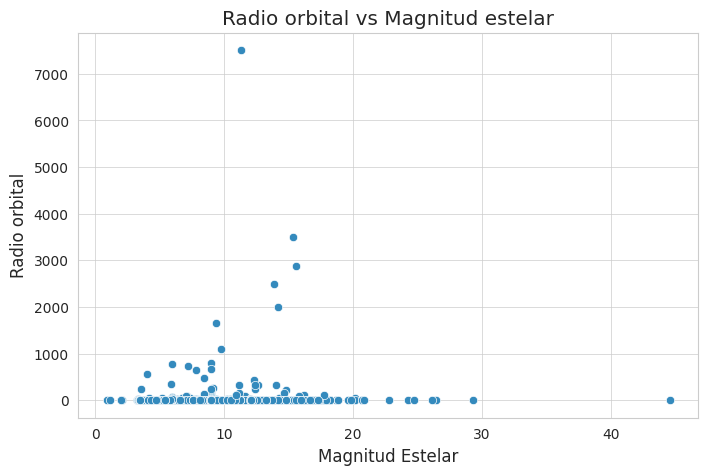

In [19]:
f, axs = plt.subplots(figsize=(8, 5))
axs = sns.scatterplot(data=df_nasa5, x="stellar_magnitude",
y="orbital_radius")
axs.set_title('Radio orbital vs Magnitud estelar')
axs.set_xlabel('Magnitud Estelar')
axs.set_ylabel('Radio orbital')


> Respuesta: Si observamos el análisis anterior observamos las siguientes relaciones:
>>
>>   Los gigantes gaseosos (Gas Giant) son los que predominan en magnitud estelar, lo que significa que tienen un mayor espectro luminoso lo que nos permite hallarlos con más facilidad y lejanía, siendo así, también son los que tienen mayor distancia con respecto a la Tierra.
>>
>>Esto nos deja ver una tendencia creciente entre la distancia y la magnitud estelar en la mayoría de los planetas.
>>Con respecto al radio orbital, no hay una relación notoria con los demás datos.
> 
>
>¿Cómo los encontramos?




Text(0, 0.5, 'Cantidad')

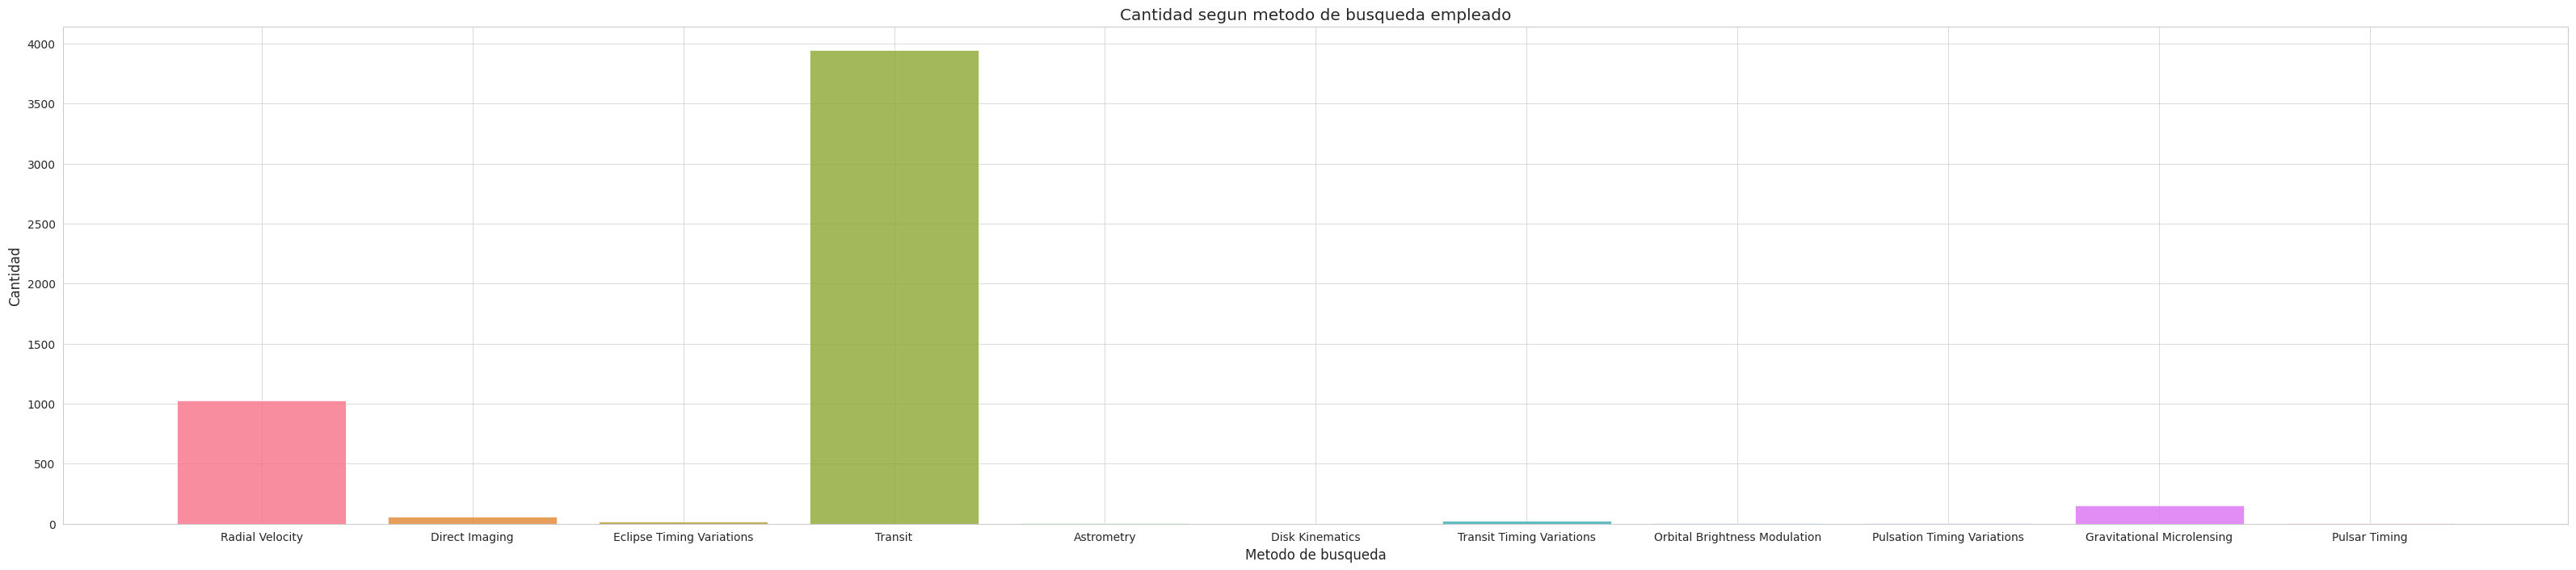

In [21]:
# Axis level
f, axs = plt.subplots(figsize=(40, 8))
sns.histplot(data=df_nasa5, x="detection_method",
hue="detection_method", shrink=.8, alpha=.8, legend=False)
axs.set_title('Cantidad segun metodo de busqueda empleado')
axs.set_xlabel('Metodo de busqueda')
axs.set_ylabel('Cantidad')

> Respuesta: 
>
>>Analizando los datos podemos observar, como de los métodos, el de tránsito es el que más planetas ha capturado seguido del método de velocidad radial. El resto de los métodos ha capturado considerablemente muchos menos.
>
>¿Hubo un aumento de hallazgos a medida que pasaba el tiempo?




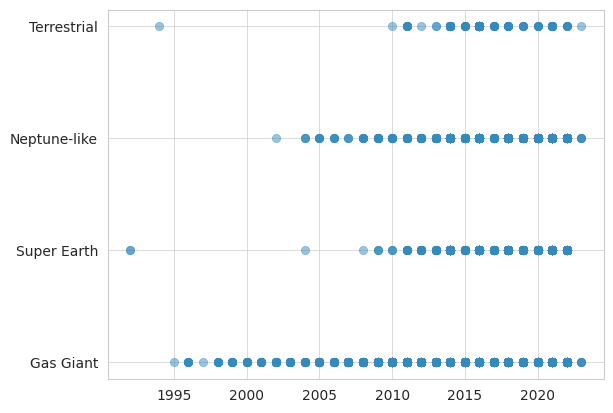

In [23]:
N = 50
x = df_nasa5.discovery_year
y = df_nasa5.planet_type
plt.scatter(x, y, alpha=0.5)

plt.show()

Text(0, 0.5, 'Distancia')

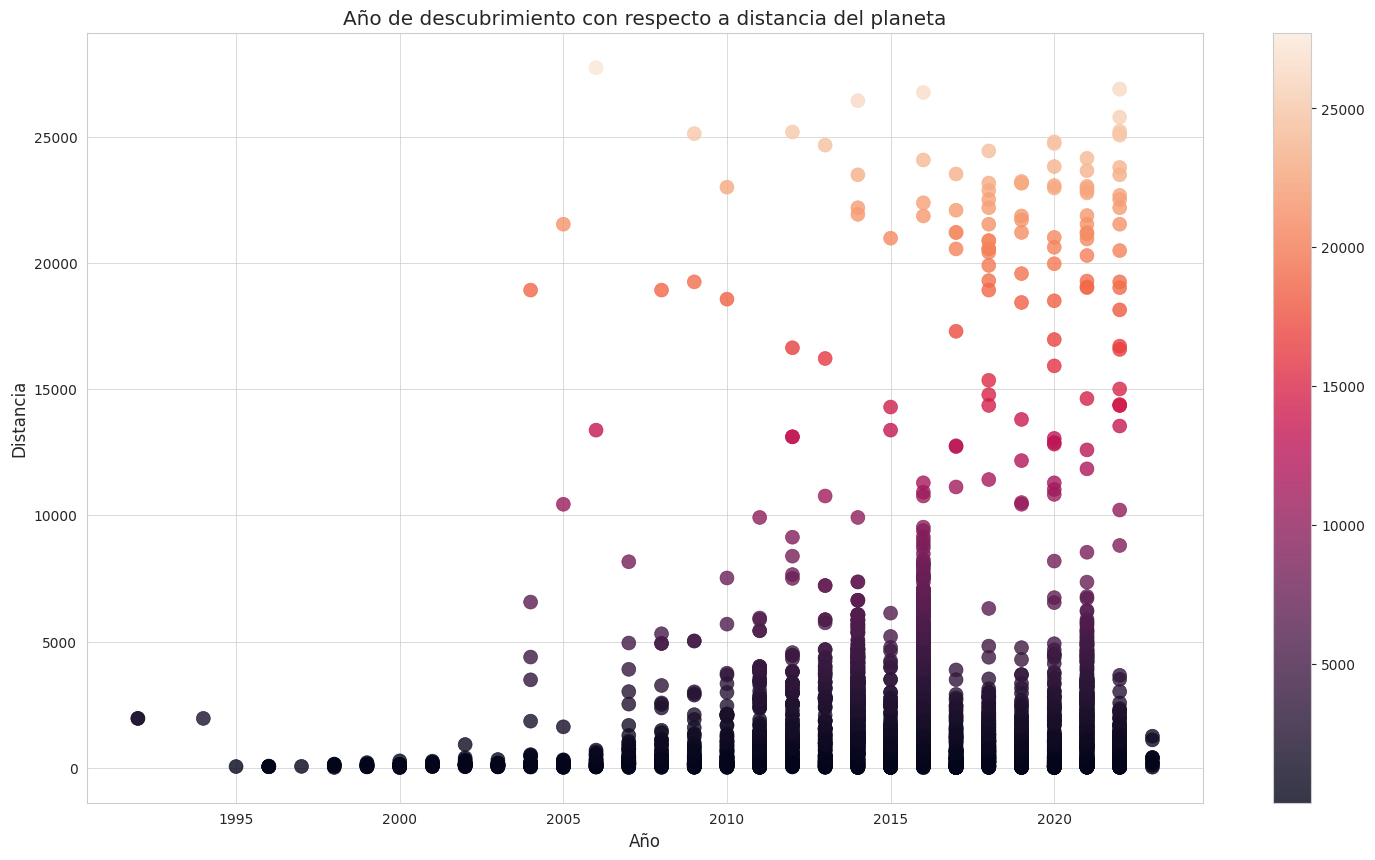

In [22]:
#@title
fig, ax = plt.subplots(figsize=(18, 10))  
mapeo_colores = ax.scatter(df_nasa5["discovery_year"], df_nasa5["distance"],c=df_nasa5["distance"], s=100,alpha=0.8)
fig.colorbar(mapeo_colores)
ax.set_title('Año de descubrimiento con respecto a distancia del planeta')
ax.set_xlabel('Año')
ax.set_ylabel('Distancia')

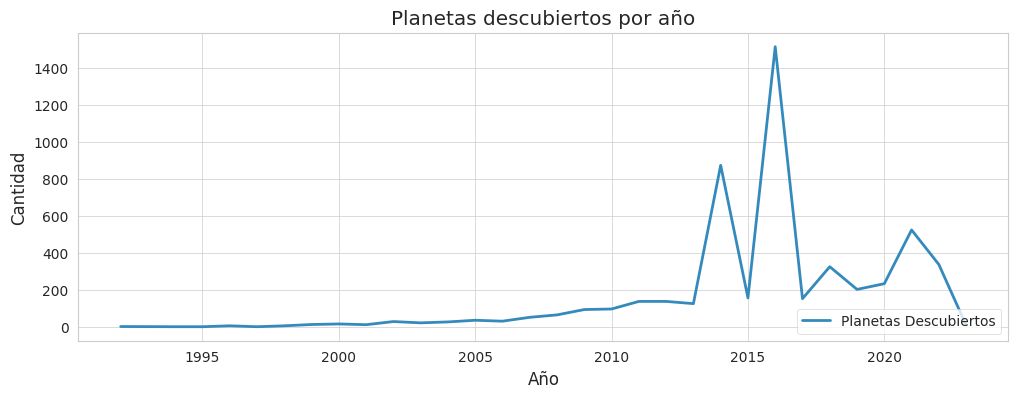

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df_nasa3.discovery_year,df_nasa3.cantidad, label='Planetas Descubiertos')
ax.set_xlabel('Año')  				
ax.set_ylabel('Cantidad')
ax.set_title('Planetas descubiertos por año')
ax.legend(loc='lower right')
plt.show()

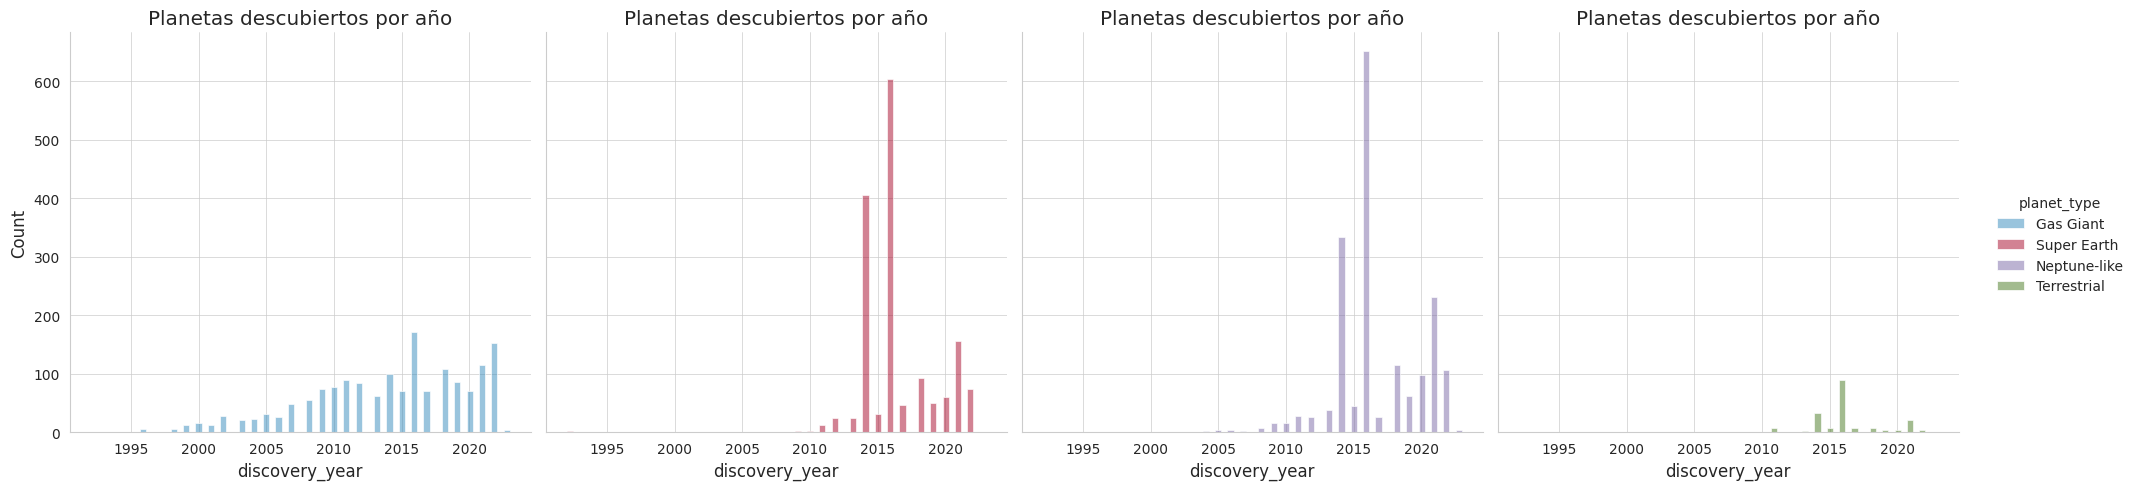

In [25]:
ax = sns.displot(data=df_nasa5, x="discovery_year", hue="planet_type", col="planet_type").set(title='Planetas descubiertos por año')

> Respuesta: 
>
>>Podemos observar un alcance mayor al pasar los años en cuestión de distancia. Es decir, con el avance tecnológico de los años, hemos logrado "ir cada vez más lejos" para poder encontrar más planetas. 
>>
>>Aun así, no podemos decir que al pasar los años hemos descubierto cada vez más, esto se dio hasta el 2016/2017 llegando al pico de planetas hallados de manera creciente. En consecuencia tuvimos una baja de hallazgos con un pico leve en 2021.
>>
>>Si los vemos de manera individual por tipos de planetas, notamos un hallazgo creciente en el tiempo con respecto a los Gigantes Gaseosos.
>>
>>En el caso de las Súper Tierras y los tipos Neptuno tienen un espectro de hallazgo muy similar al general anterior.
---
---
# **Entrenando el modelo**
>
> 

In [26]:
X= df_nasa5.drop(columns= ("name")).drop(columns = ["planet_type"]).drop(columns = ["tamaño_real"])

In [28]:
LE = LabelEncoder()
#convertimos en dato numero el pais de origen
df_nasa5['planet_type'] = LE.fit_transform(df_nasa5['planet_type'])

y = np.asarray(df_nasa5.values[0::1, 3])
y = y.astype(float)

X['mass_wrt'] = LE.fit_transform(X['mass_wrt'])
X['radius_wrt'] = LE.fit_transform(X['radius_wrt'])
X['detection_method'] = LE.fit_transform(X['detection_method'])

X['distance'] = X['distance'].astype(float)
X['stellar_magnitude'] = X['stellar_magnitude'].astype(float)
X['discovery_year'] = X['discovery_year'].astype(float)
X['mass_multiplier'] = X['mass_multiplier'].astype(float)
X['radius_multiplier'] = X['radius_multiplier'].astype(float)
X['orbital_radius'] = X['orbital_radius'].astype(float)
X['orbital_period'] = X['orbital_period'].astype(float)
X['eccentricity'] = X['eccentricity'].astype(float)
X['mass_wrt'] = X['mass_wrt'].astype(float)
X['radius_wrt'] = X['radius_wrt'].astype(float)
X['detection_method'] = X['detection_method'].astype(float)

In [29]:
sys.modules['sklearn.externals.joblib'] = joblib

In [30]:
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [31]:
forward_selection(X,y)

<ipython-input-30-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-30-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-30-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-30-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-30-79

['mass_wrt',
 'radius_multiplier',
 'radius_wrt',
 'mass_multiplier',
 'stellar_magnitude',
 'eccentricity']

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [34]:
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [35]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('distance',
 'stellar_magnitude',
 'discovery_year',
 'mass_multiplier',
 'mass_wrt',
 'radius_multiplier',
 'radius_wrt',
 'eccentricity')

In [36]:
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 

In [37]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       471
         1.0       0.96      0.99      0.97       553
         2.0       0.99      0.94      0.96       498
         3.0       0.96      0.87      0.91        52

    accuracy                           0.97      1574
   macro avg       0.97      0.95      0.96      1574
weighted avg       0.97      0.97      0.97      1574



# **Conclusiones:**

> 
###El modelo ha acertado en casi las 4 clases por lo que las maneja muy bien.La 4 clase (3.0) es la que más obtuvo un recall bajo, aun así esta sigue siendo bastante confiable.
###El acierto general ha obtenido un gran número por lo que el modelo es bastante exitoso.

---
---